In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from numpy import where
from pylab import scatter, show, legend, xlabel, ylabel
%matplotlib inline

Here we will import the dataset and select the first two columns, which are the two features that we are using. We then normalize the data.

In [13]:
df=pd.read_csv("/home/sathyanarayanan/Downloads/pima.csv")
xraw=df.iloc[:,[1,2]]
X=sklearn.preprocessing.normalize(xraw)
Y=df.iloc[:,8].values

Splitting the datasets into train and test

In [14]:
X_train,X_test, y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

<p align> We are calling the library function and fitting the training data to the model

In [15]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predicted = cross_validation.cross_val_predict(logreg, X, Y, cv=10)
print(metrics.accuracy_score(Y, predicted)) 

0.64667535854


<p align> We are displaying the maximum accuracy 

In [26]:
accuracy = cross_val_score(logreg, X, Y, cv=10,scoring='accuracy')

print (cross_val_score(logreg, X, Y, cv=10,scoring='accuracy').max())

0.675324675325


In [23]:
pos=where(y_test==1)

In [24]:
neg=where(y_test==0)

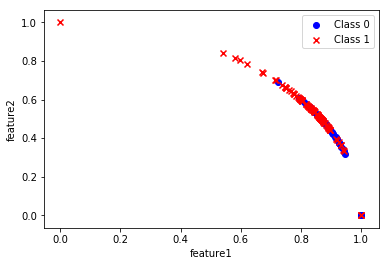

In [25]:
scatter(X_test[pos,0],X_test[pos,1],marker='o',c='b')
scatter(X_test[neg,0],X_test[neg,1],marker='x',c='r')
xlabel("feature1")
ylabel("feature2")
legend(["Class 0","Class 1"])
show()
